In [2]:
import networkx as nx
G = nx.Graph()
print(G)


Graph with 0 nodes and 0 edges


In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

In [5]:
G.add_nodes_from(['U','V'])

In [6]:
G.nodes()

NodeView((1, 2, 3, 'U', 'V'))

In [7]:
G.add_edge(1,2)# note: these take only 1 arguement so list when multiple nodes or edges

In [8]:
G.add_edge('U','V')

In [9]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
#We can add an edge even if the underlying nodes don't already exist as part of the graph.
#In that case, Python adds those nodes in automatically.


In [10]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('U', 'V')])

In [11]:
G.remove_node(2)

In [12]:
G.nodes

NodeView((1, 3, 'U', 'V', 4, 5, 6))

In [13]:
G.remove_nodes_from([4,5])

In [14]:
G.nodes

NodeView((1, 3, 'U', 'V', 6))

In [15]:
G.remove_edge(1,3)

In [16]:
G.edges()

EdgeView([(1, 6), ('U', 'V')])

In [17]:
G.remove_edges_from([(1,2),('U','V')])
G.edges

EdgeView([(1, 6)])

In [18]:
G.number_of_nodes()

5

In [19]:
G.number_of_edges()

1

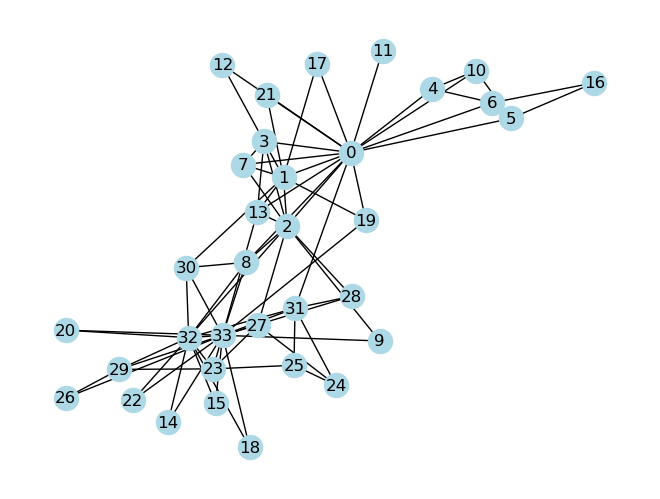

In [23]:
k = nx.karate_club_graph()
import matplotlib.pyplot as plt
nx.draw(k, with_labels = True, node_color = 'lightblue', edge_color = 'black')
plt.savefig("karate_graph.pdf")

In [24]:
k.degree()
#return dictionary type object

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [21]:
k.degree()[0]

16

In [22]:
k.degree(0)

16

In [23]:
k.number_of_nodes()

34

In [24]:
k.number_of_edges()

78

In [26]:
#Erdős-Rényi graph


In the same way that we can generate random numbers from a given
distribution, like the normal or the binomial distribution,
we can sample not numbers but random graphs
from a collection or ensemble of random graphs.

Just like different distributions of numbers
give rise to different samples of numbers,
different random graph models give rise to different kinds of random graphs.

The simplest possible random graph model is the so-called Erdos-Renyi,
also known as the ER graph model.
This family of random graphs has two parameters, capital N and lowercase p.
Here the capital N is the number of nodes in the graph,
and p is the probability for any pair of nodes to be connected by an edge.

In [42]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.2)

1

In [43]:
n = 20
p = 0.2

def er_graph(n,p):
    """generate an er graph."""
    #create empty graph
    g = nx.Graph()
    #add all n nodes in the graph
    g.add_nodes_from(range(n))
    #loop over all pairs of nodes
    for node1 in g.nodes():
        for node2 in g.nodes():
            #add an edge with probability p
            bernoulli.rvs(p=p) #FIRST P IS THE KEYWORD ARGUEMENT
            if node1 < node2 and bernoulli.rvs(p=p):
                g.add_edge(node1,node2)
    return g

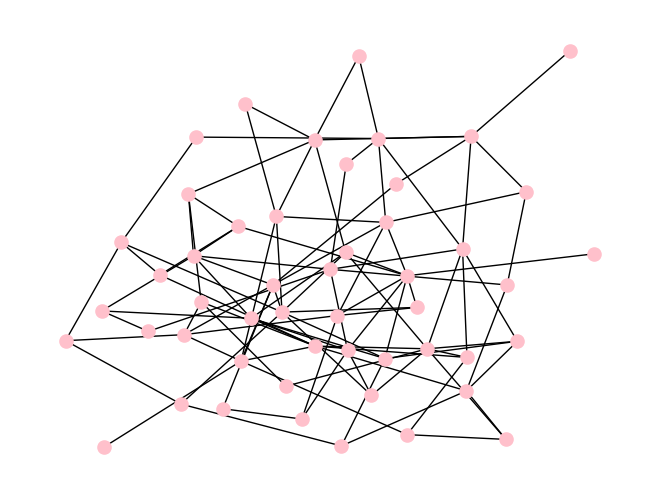

In [44]:
nx.draw(er_graph(50,0.08), node_size = 90, node_color = 'pink')
plt.savefig("er1.pdf")

### Q: How many components do you expect in an Erdős-Rényi graph with n=10 and p=1?

Ans: p=1 means an edge exists between each node pair, making the network consist of one component.

### Q: What if when p=0?

Ans:p=0 means the network will contain no edges, so each node is also its own component.


In [51]:
g = er_graph(50,0.08)
degree_sequence = [(n,d) for n, d in g.degree()]
degree_sequence

[(0, 3),
 (1, 3),
 (2, 1),
 (3, 6),
 (4, 0),
 (5, 3),
 (6, 4),
 (7, 3),
 (8, 4),
 (9, 4),
 (10, 3),
 (11, 3),
 (12, 3),
 (13, 2),
 (14, 5),
 (15, 3),
 (16, 2),
 (17, 0),
 (18, 2),
 (19, 0),
 (20, 5),
 (21, 4),
 (22, 5),
 (23, 2),
 (24, 7),
 (25, 4),
 (26, 4),
 (27, 3),
 (28, 4),
 (29, 6),
 (30, 2),
 (31, 2),
 (32, 7),
 (33, 5),
 (34, 1),
 (35, 2),
 (36, 4),
 (37, 2),
 (38, 3),
 (39, 3),
 (40, 2),
 (41, 5),
 (42, 3),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 5),
 (47, 4),
 (48, 1),
 (49, 2)]

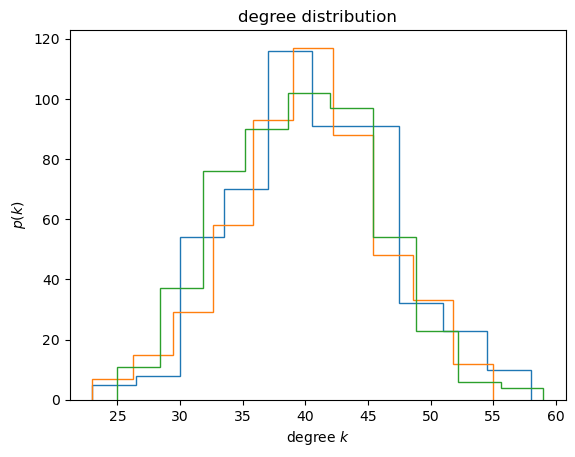

In [29]:

def plot_degree_distribution(g):
    degree_sequence = [d for n, d in g.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("degree $k$")
    plt.ylabel("$p(k)$")
    plt.title("degree distribution")
g1 = er_graph(500,0.08)
plot_degree_distribution(g1)

g2 = er_graph(500,0.08)
plot_degree_distribution(g2)

g3 = er_graph(500,0.08)
plot_degree_distribution(g3)
plt.savefig("hist_3.pdf")

In [54]:
import numpy as np
a1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter = ',')
a2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter = ',')


In [55]:
g1 = nx.to_networkx_graph(a1)
g2 = nx.to_networkx_graph(a2)

In [56]:
def basic_net_stats(g):
    print("no. of nodes: " , g.number_of_nodes())
    print("no. of edges: " , g.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))
    
basic_net_stats(g2)

no. of nodes:  877
no. of edges:  3063
Average degree: 0.40


In [59]:
g1.degree()[0]

8

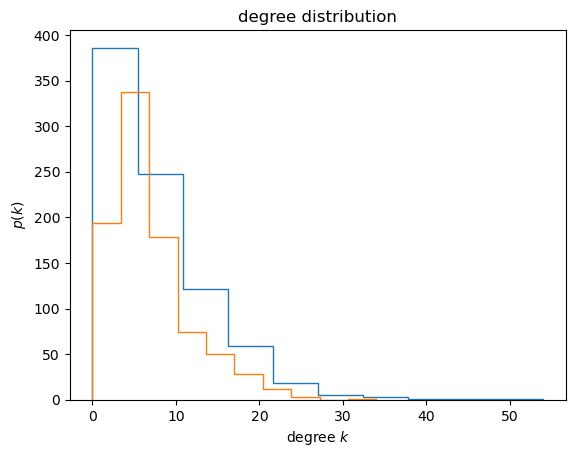

In [33]:
plot_degree_distribution(g1)
plot_degree_distribution(g2)
plt.savefig("village_histpdf")


In [52]:
gen = nx.connected_components(g1)
#gen.__next__()

NameError: name 'g1' is not defined